In [13]:
import requests
import pylab as pl
from pyquery import PyQuery as pq
import numpy as np
from matplotlib import pyplot as plt
import scipy
import pandas as pd
from lxml import etree
import config
import os
from os import path
import seaborn as sns

%matplotlib inline

In [14]:
df_info = pd.read_csv(path.join(config.DIR_DATA_ROOT, 'records-all-with-info.csv'))

In [15]:
s_belief = []
s_pair = []
for (gname, g) in df_info.groupby(['mover-en', 'name-en']):
    #print(gname, '\n', g.vote.value_counts())
    value_counts = g.vote.value_counts()
    belief = value_counts.get('Yes', 0) / value_counts.sum()
    s_belief.append(belief)
    s_pair.append(gname)


In [16]:
df_belief = pd.DataFrame(s_belief, index=s_pair, columns = ['belief']).reset_index()
df_belief['mover'] = df_belief['index'].apply(lambda x: x[0])
df_belief['voter'] = df_belief['index'].apply(lambda x: x[1])
# DataFrame.pivot(index=None, columns=None, values=None)
df_belief_matrix = df_belief.pivot('mover', 'voter', 'belief')


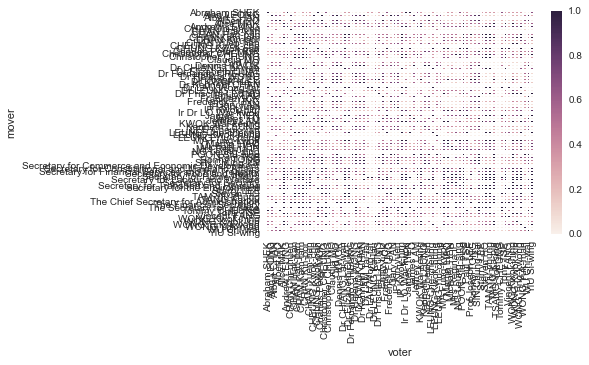

In [17]:
sns.heatmap(df_belief_matrix)

In [18]:
df_belief_matrix

voter,Abraham SHEK,Alan LEONG,Albert CHAN,Albert HO,Alice MAK,Andrew LEUNG,CHAN Chi-chuen,CHAN Hak-kan,CHAN Han-pan,CHAN Kam-lam,...,TSANG Yok-sing,Tommy CHEUNG,Tony TSE,Vincent FANG,WONG Kwok-hing,WONG Kwok-kin,WONG Ting-kwong,WONG Yuk-man,WU Chi-wai,YIU Si-wing
mover,,,,,,,,,,,,,,,,,,,,,
Abraham SHEK,1.000000,0.000000,0.000000,0.000000,0.333333,1.000000,0.000000,0.333333,0.000000,0.333333,...,0,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,0.666667
Alan LEONG,0.000000,1.000000,0.750000,0.625000,0.250000,0.000000,0.875000,0.125000,0.000000,0.125000,...,0,0.250000,0.250000,0.000000,0.250000,0.250000,0.125000,0.500000,0.875000,0.250000
Albert CHAN,0.000000,0.010256,0.997436,0.002564,0.000000,0.000000,0.466667,0.002564,0.002564,0.002564,...,0,0.002564,0.002564,0.000000,0.002564,0.002564,0.002564,0.205128,0.007692,0.000000
Albert HO,0.000000,0.666667,0.888889,1.000000,0.333333,0.000000,0.888889,0.111111,0.000000,0.111111,...,0,0.222222,0.111111,0.111111,0.333333,0.222222,0.111111,0.666667,0.888889,0.000000
Alice MAK,0.200000,0.400000,0.400000,0.400000,1.000000,0.600000,0.200000,0.400000,0.600000,0.600000,...,0,0.200000,1.000000,0.200000,1.000000,0.400000,0.600000,0.400000,0.400000,0.600000
Andrew LEUNG,0.714286,0.214286,0.142857,0.071429,0.857143,1.000000,0.214286,0.714286,0.642857,1.000000,...,0,0.571429,0.785714,0.285714,0.857143,0.714286,0.928571,0.071429,0.142857,0.857143
CHAN Chi-chuen,0.001783,0.010695,0.545455,0.005348,0.000000,0.001783,0.989305,0.001783,0.001783,0.001783,...,0,0.001783,0.000000,0.003565,0.003565,0.001783,0.001783,0.098039,0.007130,0.000000
CHAN Hak-kan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
CHAN Han-pan,0.000000,0.500000,0.000000,0.000000,0.500000,0.500000,0.000000,1.000000,1.000000,1.000000,...,0,0.000000,1.000000,0.500000,0.500000,0.500000,1.000000,0.000000,0.500000,0.500000


In [19]:
possible_members = df_info.member_id.unique()
current_movers = df_belief_matrix.index
set(possible_members) - set(current_movers)

{'Dr LAM Tai-fai', 'Prof Joseph LEE', 'TSANG Yok-sing'}

In [20]:
df_pcs = pd.read_csv(path.join(config.DIR_DATA_ROOT, 'voting-PC1to3.csv')).set_index('Unnamed: 0')
df_pcs.head()

,PC1,PC2,PC3
Unnamed: 0,,,
TSANG Yok-sing,-17.095649,-8.038985,-1.055447
Albert HO,-23.410446,4.679168,3.350926
LEE Cheuk-yan,-24.261251,6.265021,2.615829
James TO,-23.018250,3.624729,3.224040
CHAN Kam-lam,27.861223,2.062067,-4.897880


In [21]:
# Add non-existing movers
# e.g. {'Dr LAM Tai-fai', 'Prof Joseph LEE', 'TSANG Yok-sing'}
# does not have any motions. Put all zeros
df_belief_matrix = df_belief_matrix.T
for new_mover in set(possible_members) - set(current_movers):
    df_belief_matrix[new_mover] = pd.Series(np.zeros(len(possible_members)), index=df_belief_matrix.index)
df_belief_matrix = df_belief_matrix.T

# Reorder Mover
df_belief_matrix['PC1'] = df_pcs['PC1']
df_belief_matrix = df_belief_matrix.sort('PC1')
del df_belief_matrix['PC1']

# Reorder Voter
df_belief_matrix = df_belief_matrix.T
df_belief_matrix['PC1'] = df_pcs['PC1']
df_belief_matrix = df_belief_matrix.sort('PC1')
del df_belief_matrix['PC1']


# Change back to Mover as index and Voter as column
df_belief_matrix = df_belief_matrix.T

df_belief_matrix
#df_pcs

voter,LEUNG Kwok-hung,Albert CHAN,CHAN Chi-chuen,WONG Yuk-man,Gary FAN,Claudia MO,Cyd HO,LEE Cheuk-yan,LEUNG Yiu-chung,Dr Fernando CHEUNG,...,Tony TSE,Alice MAK,Andrew LEUNG,POON Siu-ping,CHAN Kam-lam,Christopher CHEUNG,Steven HO,WONG Ting-kwong,Ir Dr LO Wai-kwok,TAM Yiu-chung
mover,,,,,,,,,,,,,,,,,,,,,
LEUNG Kwok-hung,0.991557,0.624765,0.486867,0.113508,0.014071,0.004690,0.003752,0.003752,0.051595,0.004690,...,0.000000,0.000938,0.000000,0.000938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Albert CHAN,0.453846,0.997436,0.466667,0.205128,0.151282,0.094872,0.007692,0.005128,0.025641,0.005128,...,0.002564,0.000000,0.000000,0.000000,0.002564,0.002564,0.002564,0.002564,0.002564,0.002564
CHAN Chi-chuen,0.502674,0.545455,0.989305,0.098039,0.057041,0.051693,0.012478,0.010695,0.021390,0.010695,...,0.000000,0.000000,0.001783,0.005348,0.001783,0.000000,0.001783,0.001783,0.000000,0.001783
WONG Yuk-man,0.496815,0.687898,0.503185,0.987261,0.178344,0.210191,0.031847,0.038217,0.050955,0.038217,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gary FAN,0.641026,0.641026,0.589744,0.282051,0.897436,0.487179,0.307692,0.333333,0.205128,0.307692,...,0.000000,0.051282,0.025641,0.102564,0.025641,0.025641,0.025641,0.025641,0.025641,0.025641
Claudia MO,0.600000,0.680000,0.880000,0.520000,0.760000,1.000000,0.720000,0.600000,0.480000,0.720000,...,0.040000,0.120000,0.040000,0.200000,0.160000,0.080000,0.160000,0.120000,0.080000,0.120000
Cyd HO,0.548387,0.419355,0.516129,0.322581,0.580645,0.483871,0.741935,0.580645,0.451613,0.548387,...,0.032258,0.096774,0.032258,0.129032,0.000000,0.032258,0.000000,0.000000,0.032258,0.000000
LEE Cheuk-yan,0.520000,0.560000,0.560000,0.360000,0.760000,0.640000,0.800000,0.800000,0.480000,0.680000,...,0.000000,0.240000,0.000000,0.440000,0.080000,0.000000,0.080000,0.080000,0.000000,0.080000
LEUNG Yiu-chung,0.666667,0.333333,0.333333,0.333333,0.666667,1.000000,1.000000,0.666667,1.000000,0.666667,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


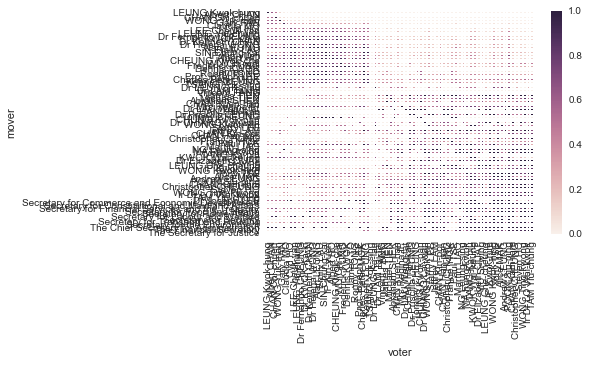

In [22]:
#figsize(20, 20)
sns.heatmap(df_belief_matrix)

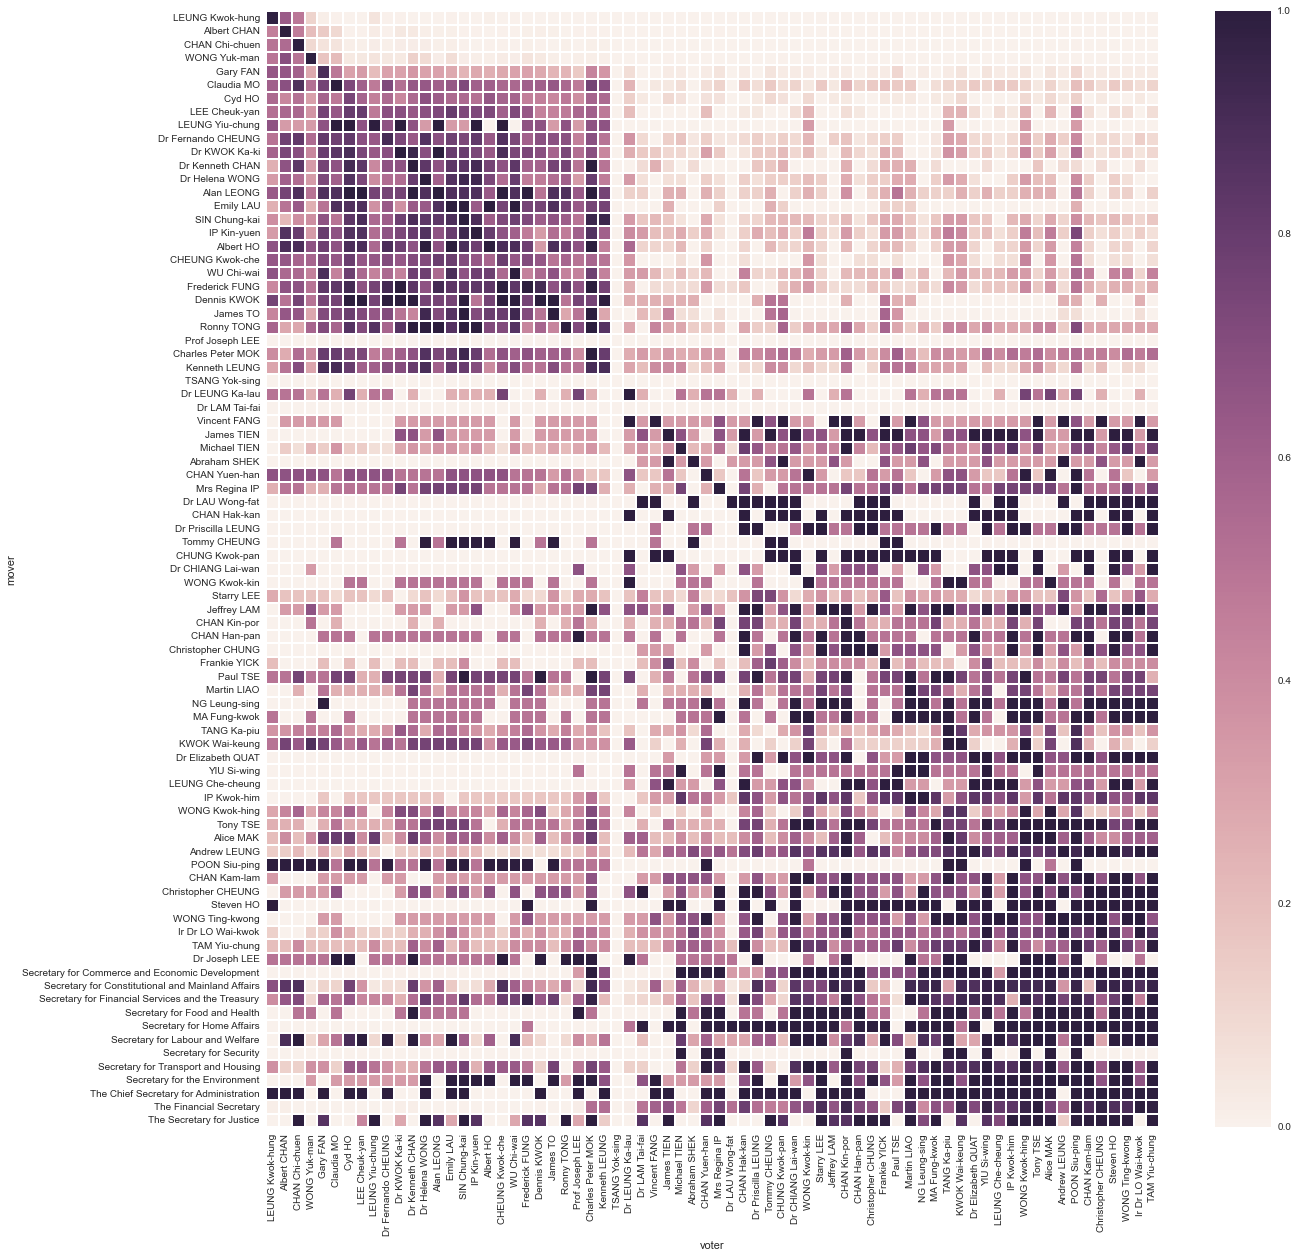

In [23]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_belief_matrix)

In [24]:
print(len(df_belief_matrix.index))
print(len(df_belief_matrix.columns))

83
70
